<a href="https://colab.research.google.com/github/Damanger/COLAB_CF/blob/main/Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.-Cargar el DS

#2.-Analizar los datos

*   Identifiar variables y su relación con Y     **}** Conjunto de variables -> Importación

#3.-Crear un modelo con una arquitectura densa

*   Entrenar

#4.-Evaluar el modelo

*   MAE valor absoluto Medio

*   RMSE

#5.-Historia -> Cómo evoluciona el error

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import boston_housing

# Boston Housing

* Contiene datos sobre precios de viviendas en Boston basados en características como la cantidad de habitaciones, la proximidad a ríos, etc.

* La variable objetivo es el precio medio de las viviendas.

El conjunto de datos contiene información sobre el mercado inmobiliario en Boston en la década de 1970. Fue recopilado originalmente para estudiar la relación entre las características de las casas y su valor.

Tamaño:
* **Características**: 13 variables predictoras numéricas.
* **Registros**: 506 muestras.
* **Variable objetivo**: Precio medio de las viviendas en miles de dólares (medv).

Variables del Dataset
* **CRIM**: Tasa de criminalidad per cápita.
* **ZN**: Proporción de suelo residencial zonificado para lotes mayores a 25,000 pies cuadrados.
* **INDUS**: Proporción de acres comerciales no minoristas por ciudad.
* **CHAS**: Variable binaria que indica si la propiedad limita con el río Charles (1 si sí, 0 si no).
* **NOX**: Concentración de óxidos nítricos (partes por 10 millones).
* **RM**: Promedio de habitaciones por vivienda.
* **AGE**: Proporción de unidades ocupadas por propietarios construidas antes de 1940.
* **DIS**: Distancia ponderada a cinco centros de empleo en Boston.
* **RAD**: Índice de accesibilidad a carreteras radiales.
* **TAX**: Tasa de impuesto a la propiedad por $10,000.
* **PTRATIO**: Proporción alumno-profesor por ciudad.
* **B**: Cálculo basado en la población negra (1000(Bk - 0.63)^2).
* **LSTAT**: Porcentaje de la población con bajo estatus socioeconómico.
* **MEDV**: Precio medio de las viviendas (en miles de dólares). Variable objetivo.



In [9]:
(x, y), (X_test, y_test) = boston_housing.load_data()

In [10]:
# Nombres de las columnas
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT'
]

In [11]:
#Crear un DataFrame
data = pd.DataFrame(x, columns=column_names)
data['MEDV'] = y  # Añadir la variable objetivo

In [12]:
data.head().T

,0,1,2,3,4
CRIM,1.23247,0.02177,4.89822,0.03961,3.69311
ZN,0.00000,82.50000,0.00000,0.00000,0.00000
INDUS,8.14000,2.03000,18.10000,5.19000,18.10000
CHAS,0.00000,0.00000,0.00000,0.00000,0.00000
NOX,0.53800,0.41500,0.63100,0.51500,0.71300
RM,6.14200,7.61000,4.97000,6.03700,6.37600
AGE,91.70000,15.70000,100.00000,34.50000,88.40000
DIS,3.97690,6.27000,1.33250,5.98530,2.56710
RAD,4.00000,2.00000,24.00000,5.00000,24.00000
TAX,307.00000,348.00000,666.00000,224.00000,666.00000


In [13]:
data.size

5656

In [14]:
data.shape

(404, 14)

In [15]:
type(data.values)

numpy.ndarray

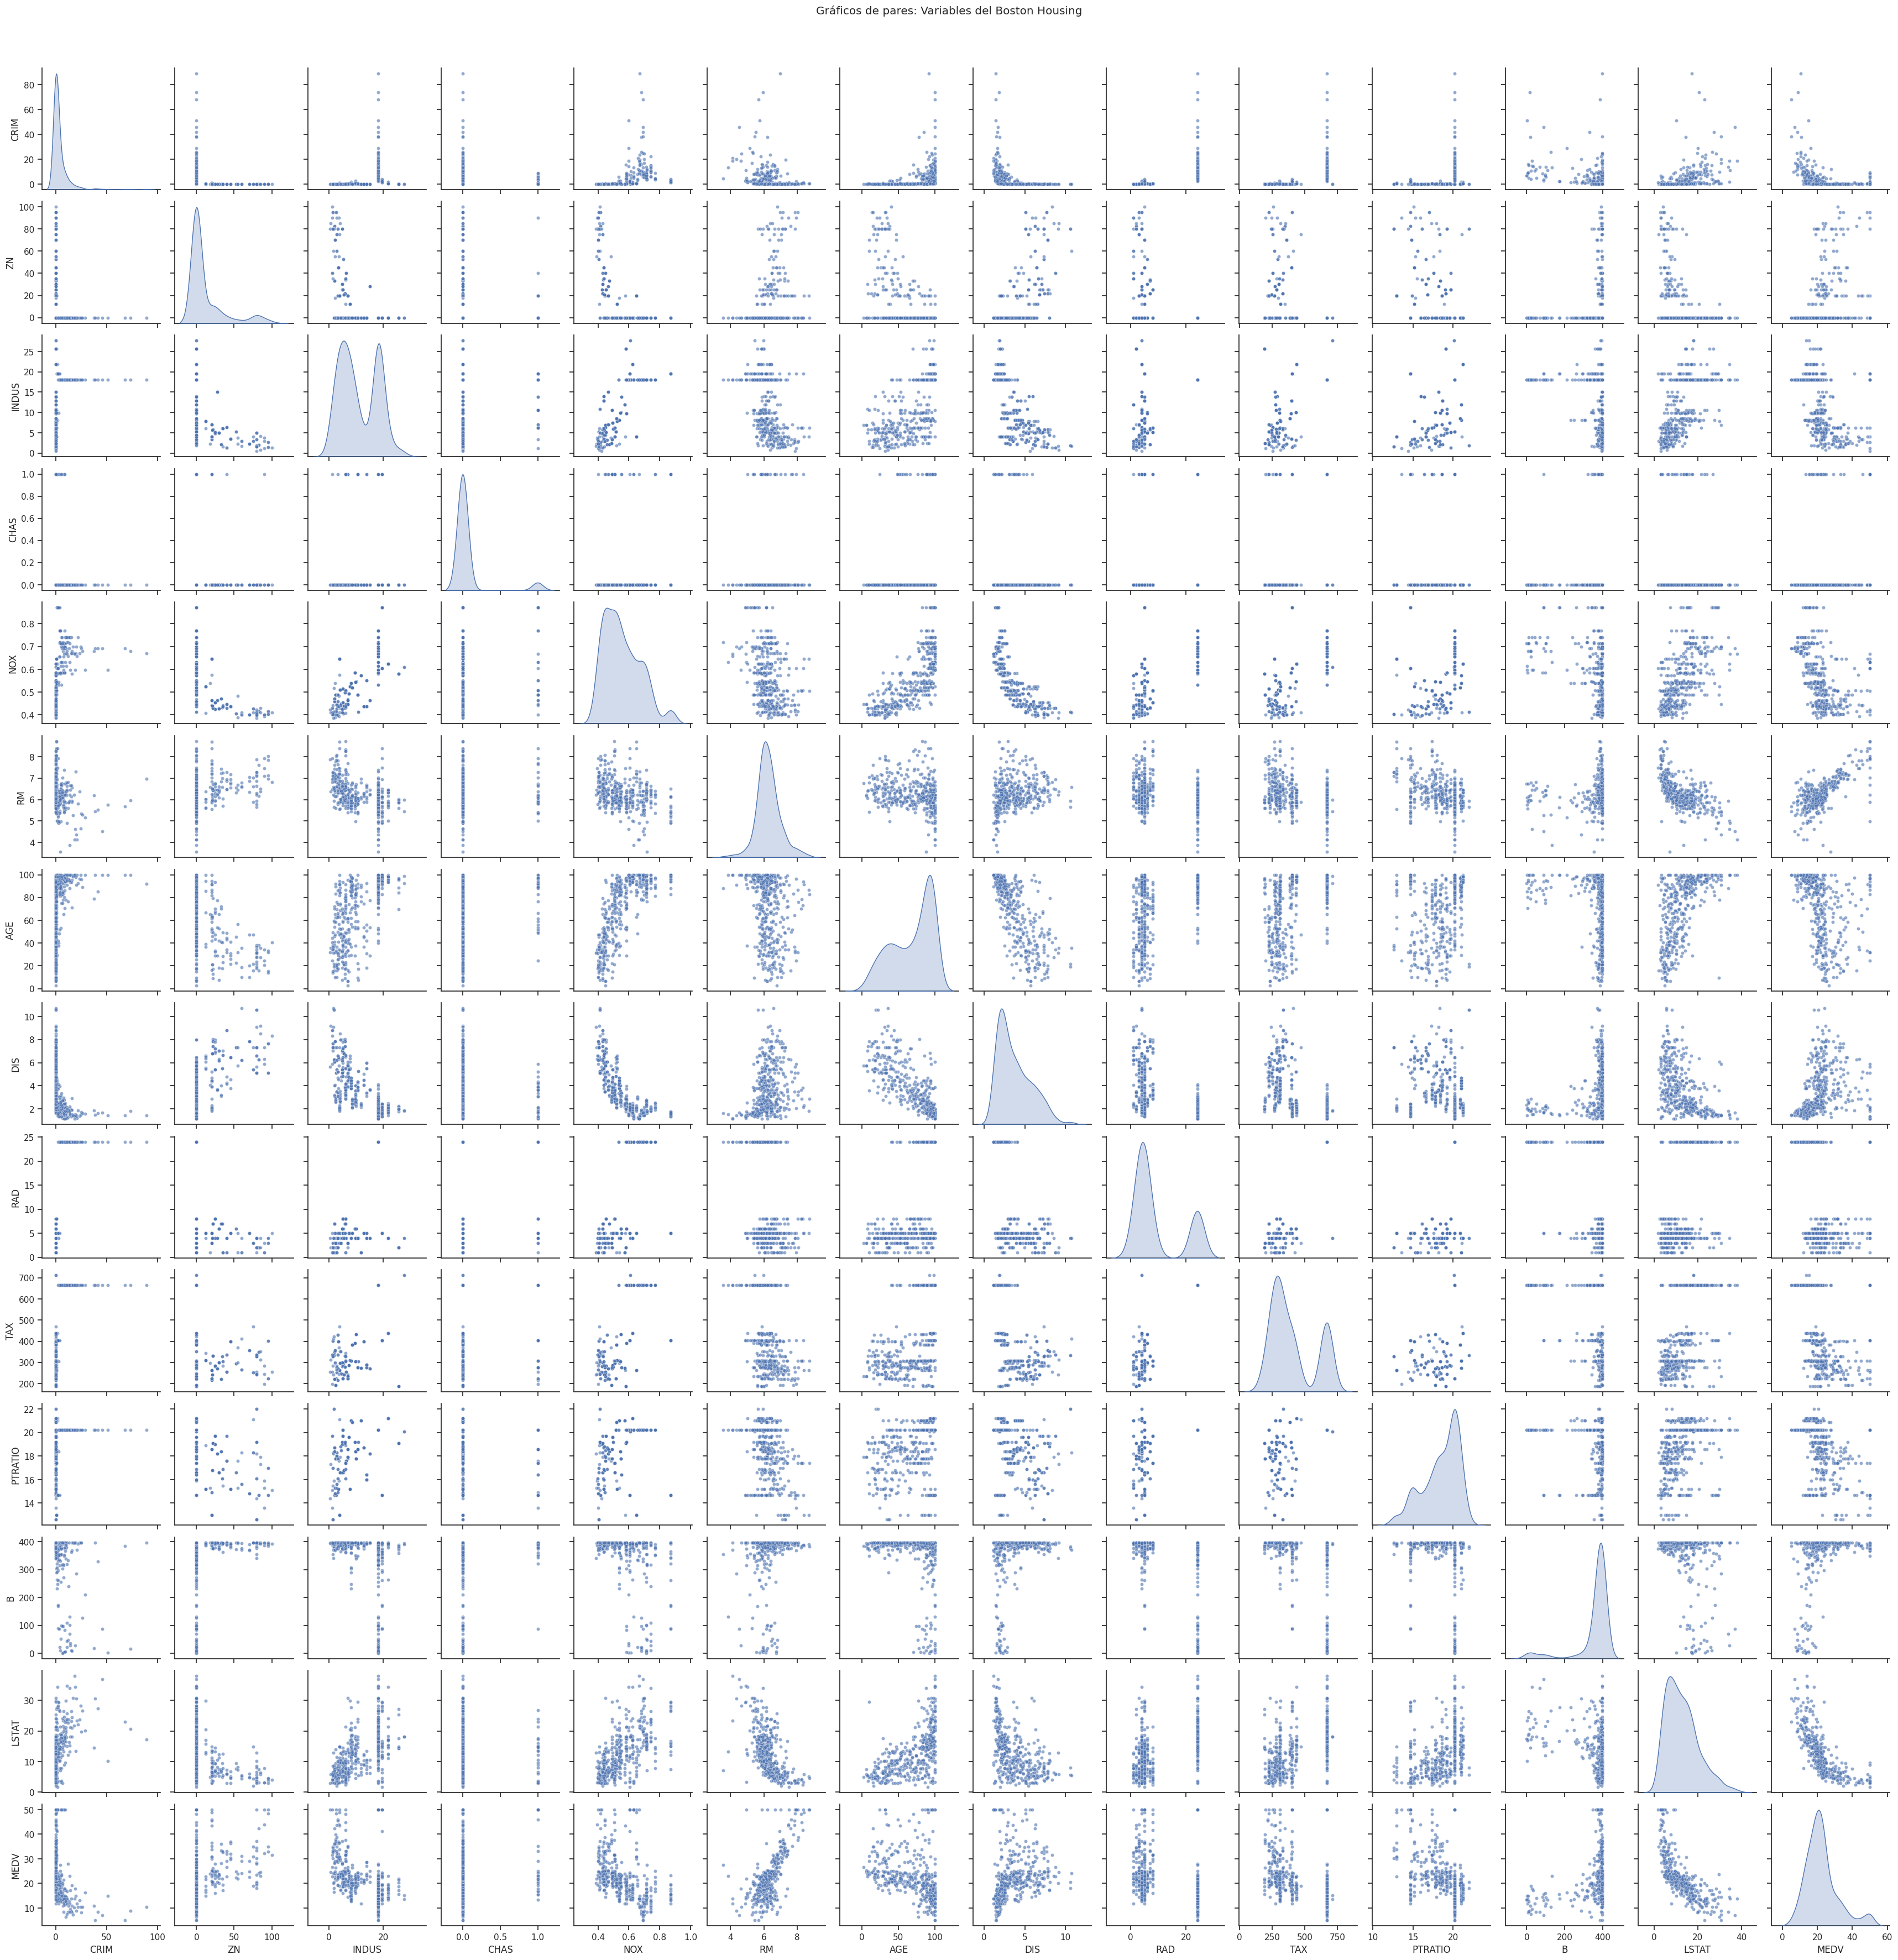

In [16]:
# Relación de todas las variables entre sí
sns.set(style = "ticks", color_codes = True)
pairplot = sns.pairplot(data, diag_kind="kde", plot_kws={"alpha": 0.6, "s": 20})
plt.suptitle("Gráficos de pares: Variables del Boston Housing", y = 1.02)
plt.show()

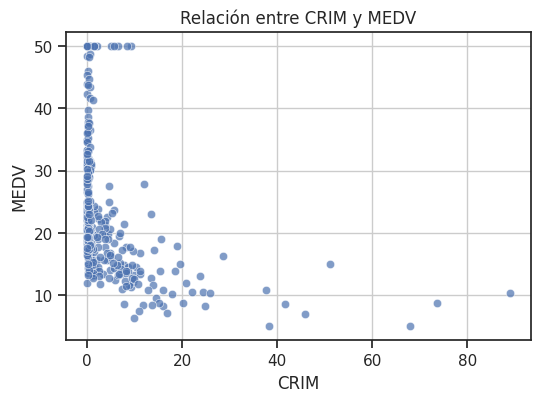

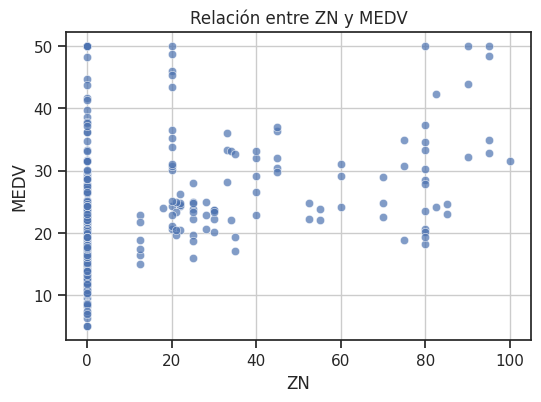

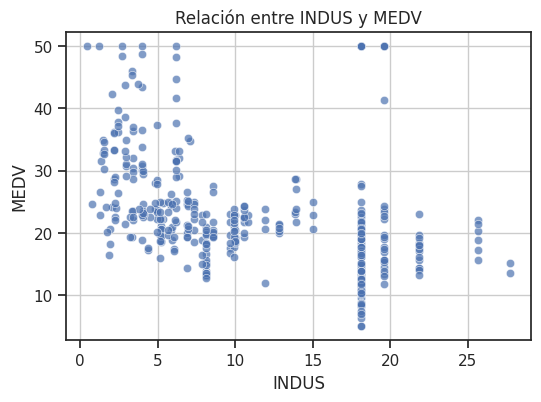

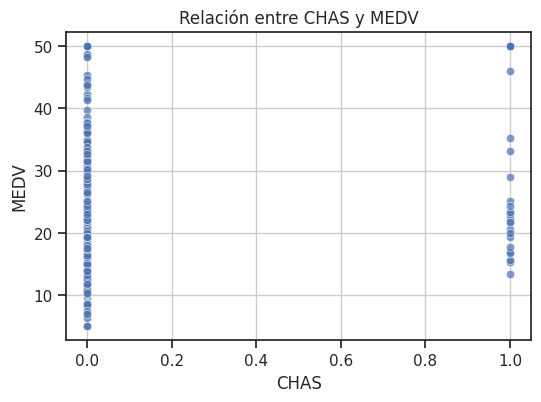

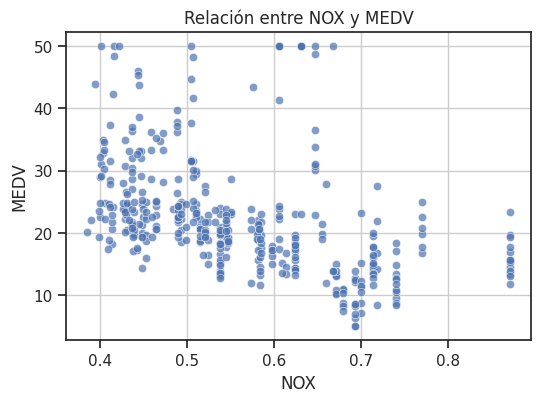

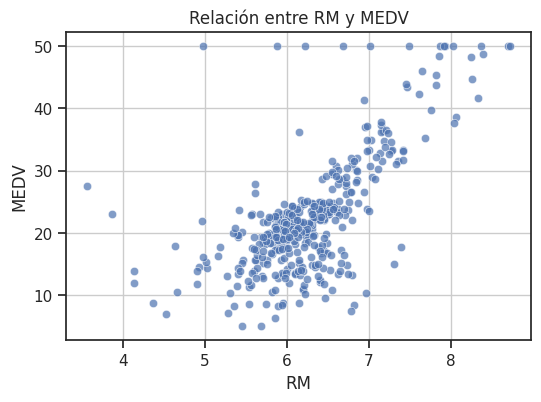

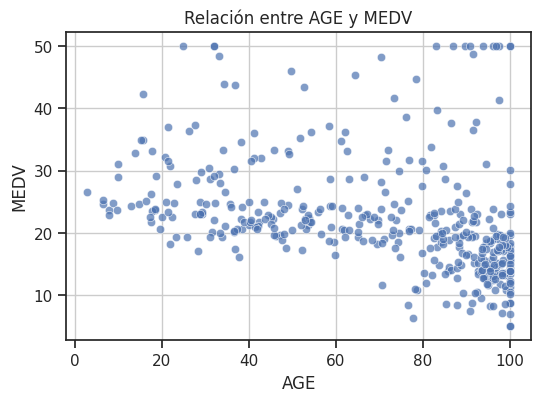

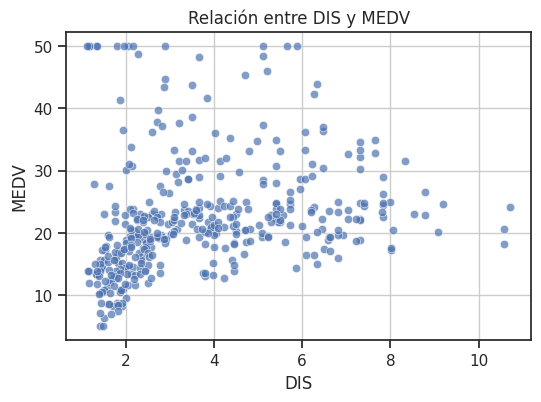

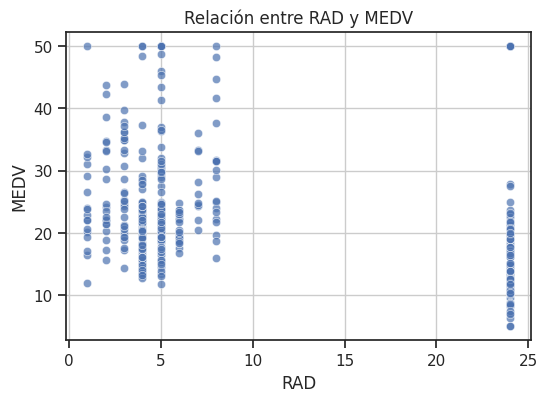

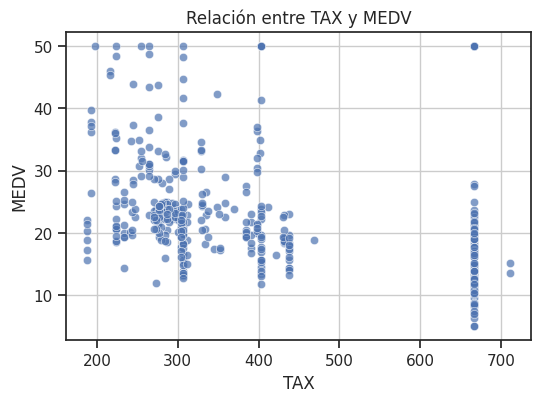

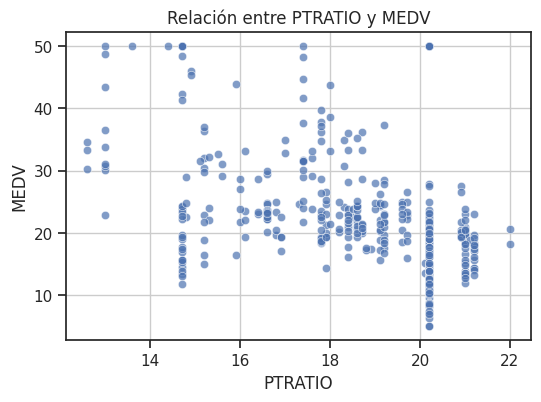

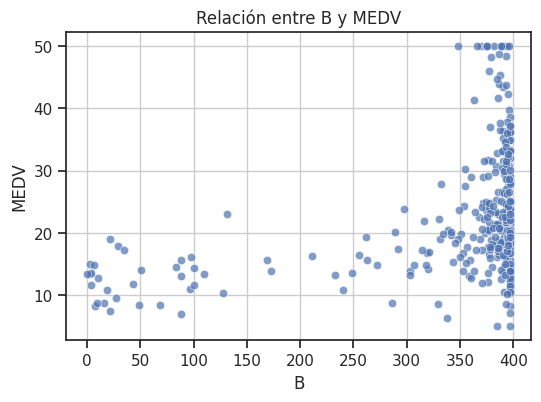

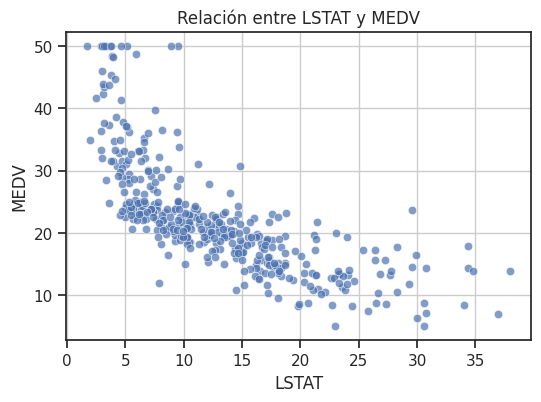

In [21]:
# Gráficos individuales: Relación de cada variable independiente con la variable objetivo
for col in column_names:
    plt.figure(figsize = (6, 4))
    sns.scatterplot(data = data, x = col, y = "MEDV", alpha = 0.7)
    plt.title(f"Relación entre {col} y MEDV")
    plt.grid()
    plt.show()


In [23]:
# Normalización de los datos
scaler = StandardScaler()  ## media 0 y varianza = 1
x = scaler.fit_transform(x)
X_test = scaler.transform(X_test)

In [24]:
x.mean(axis = 0), x.std(axis = 0)

(array([-1.01541438e-16,  1.09923072e-17,  1.74337992e-15, -1.26686340e-16,
        -5.25377321e-15,  6.41414864e-15,  2.98441140e-16,  4.94653823e-16,
         1.12671149e-17, -1.98136337e-16,  2.36686358e-14,  5.95679996e-15,
         6.13920356e-16]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [28]:
#Separamos entrenamientos y pruebas/validación
#random_stte --> random.seed
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((323, 13), (81, 13), (323,), (81,))

In [34]:
#Crear modelo MLP
model = Sequential([
    Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)),  #Capa oculta 1
    Dense(32, activation = 'relu'),                                     #Capa oculta 2
    Dense(1)                                                            #Capa de salida
])

In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
#Compilar el modelo
model.compile(optimizer = 'adam' , loss = 'mse', metrics = ['mae'])

In [42]:
#Entrenar el modelo
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 100, batch_size = 32, verbose = 1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 631.3933 - mae: 23.0412 - val_loss: 442.0773 - val_mae: 19.7317
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 594.9757 - mae: 22.1952 - val_loss: 415.0068 - val_mae: 19.0241
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 543.8340 - mae: 21.0775 - val_loss: 385.6443 - val_mae: 18.2175
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 535.7293 - mae: 21.0463 - val_loss: 349.2810 - val_mae: 17.1974
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 453.7092 - mae: 18.9513 - val_loss: 303.3883 - val_mae: 15.8563
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 396.3426 - mae: 17.4860 - val_loss: 248.4810 - val_mae: 14.2187
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 314.8800 - mae: 15.6132 - val_loss: 188.5352 - val_mae: 12.1885
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 214.1265 - mae: 12.4604 - val_loss: 129.9850 - val_mae: 9.7892
Epoch 9/1